In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openintro-possum/possum.csv


# Getting the data

1. Loading as DF
2. Split into train, test

1st loading the data into a pandas DataFrame

In [3]:
path = '/kaggle/input/openintro-possum/possum.csv'

df = pd.read_csv(path)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Studying the `df`

In [4]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


`train_test_split`

In [6]:
df.drop(labels='case', axis=1, inplace=True)
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [7]:
X = df.drop(labels=['hdlngth'], axis=1).copy()
y = df['hdlngth']

X.head()

,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [8]:
y.head()

0    94.1
1    92.5
2    94.0
3    93.2
4    91.5
Name: hdlngth, dtype: float64

In [9]:
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((104, 12), (104,))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=10)

for set_ in (X_train, X_test, y_train, y_test):
    print(f'{set_.shape} ; {set_[:2]}')

(94, 12) ; [[1 'Vic' 'f' 5.0 55.4 90.5 35.0 73.4 53.9 15.2 28.0 32.0]
 [1 'Vic' 'f' 4.0 56.7 94.0 39.0 74.8 52.0 14.9 28.0 34.0]]
(10, 12) ; [[1 'Vic' 'm' 3.0 54.1 93.0 37.0 68.0 52.5 14.5 27.0 31.0]
 [5 'other' 'f' 3.0 55.8 86.0 36.5 63.2 44.2 15.7 26.5 34.0]]
(94,) ; [94.4 94.3]
(10,) ; [92.8 90.4]


# Data Exploration

Making a copy of df in `X_copy` and `y_copy`

Combining training data into a dataframe

In [11]:
train_data = (np.concatenate((X_train, y_train.reshape(94,1)), axis=1))

data = pd.DataFrame(train_data, columns=['site', 'Pop', 'sex', 'age', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'hdlngth'], copy=True)
data.head()

,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,hdlngth
0,1,Vic,f,5.0,55.4,90.5,35.0,73.4,53.9,15.2,28.0,32.0,94.4
1,1,Vic,f,4.0,56.7,94.0,39.0,74.8,52.0,14.9,28.0,34.0,94.3
2,7,other,m,6.0,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5,97.7
3,7,other,m,4.0,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0,94.8
4,6,other,m,1.0,51.0,81.0,36.5,63.0,44.3,13.2,23.0,28.0,86.5


Splitting `data` into `data_num` and `data_cat` for better visualization

In [12]:
data_num = pd.DataFrame(data.drop(labels=['Pop', 'sex'], axis=1), dtype=np.float64)
data_cat = pd.DataFrame(data, columns=['Pop', 'sex'], copy=True)

print(data_num.info())
print(data_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      94 non-null     float64
 1   age       93 non-null     float64
 2   skullw    94 non-null     float64
 3   totlngth  94 non-null     float64
 4   taill     94 non-null     float64
 5   footlgth  93 non-null     float64
 6   earconch  94 non-null     float64
 7   eye       94 non-null     float64
 8   chest     94 non-null     float64
 9   belly     94 non-null     float64
 10  hdlngth   94 non-null     float64
dtypes: float64(11)
memory usage: 8.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pop     94 non-null     object
 1   sex     94 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB
None


## Data Vizualization

Converting `data_cat` into one_hot encoded values

In [13]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False)

encoded_ = OH_encoder.fit_transform(data_cat)
encoded = np.concatenate((encoded_[:, 0].reshape(-1, 1), encoded_[:, 2].reshape(-1, 1)), axis=1)
encoded

array([[1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.

Replacing `Pop` and `sex` columns with encoded values

In [16]:
OH_encoder.categories_

[array(['Vic', 'other'], dtype=object), array(['f', 'm'], dtype=object)]

In [17]:
data[:5], encoded[:5]

(  site    Pop sex  age skullw totlngth taill footlgth earconch   eye chest  \
 0    1    Vic   f  5.0   55.4     90.5  35.0     73.4     53.9  15.2  28.0   
 1    1    Vic   f  4.0   56.7     94.0  39.0     74.8     52.0  14.9  28.0   
 2    7  other   m  6.0   58.4     84.5  35.0     64.4     46.2  14.4  29.0   
 3    7  other   m  4.0   55.7     83.0  38.0     66.5     47.7  14.0  25.0   
 4    6  other   m  1.0   51.0     81.0  36.5     63.0     44.3  13.2  23.0   
 
   belly hdlngth  
 0  32.0    94.4  
 1  34.0    94.3  
 2  30.5    97.7  
 3  33.0    94.8  
 4  28.0    86.5  ,
 array([[1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]))

In [18]:
data['Pop'] = encoded[:,0]
data['sex'] = encoded[:, 1]

data.head()

,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,hdlngth
0,1,1.0,1.0,5.0,55.4,90.5,35.0,73.4,53.9,15.2,28.0,32.0,94.4
1,1,1.0,1.0,4.0,56.7,94.0,39.0,74.8,52.0,14.9,28.0,34.0,94.3
2,7,0.0,0.0,6.0,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5,97.7
3,7,0.0,0.0,4.0,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0,94.8
4,6,0.0,0.0,1.0,51.0,81.0,36.5,63.0,44.3,13.2,23.0,28.0,86.5


Plotting hist graph

In [19]:
data = pd.DataFrame(data, dtype=np.float64)

array([[<Axes: title={'center': 'site'}>,
        <Axes: title={'center': 'Pop'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'skullw'}>,
        <Axes: title={'center': 'totlngth'}>,
        <Axes: title={'center': 'taill'}>,
        <Axes: title={'center': 'footlgth'}>],
       [<Axes: title={'center': 'earconch'}>,
        <Axes: title={'center': 'eye'}>,
        <Axes: title={'center': 'chest'}>,
        <Axes: title={'center': 'belly'}>],
       [<Axes: title={'center': 'hdlngth'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

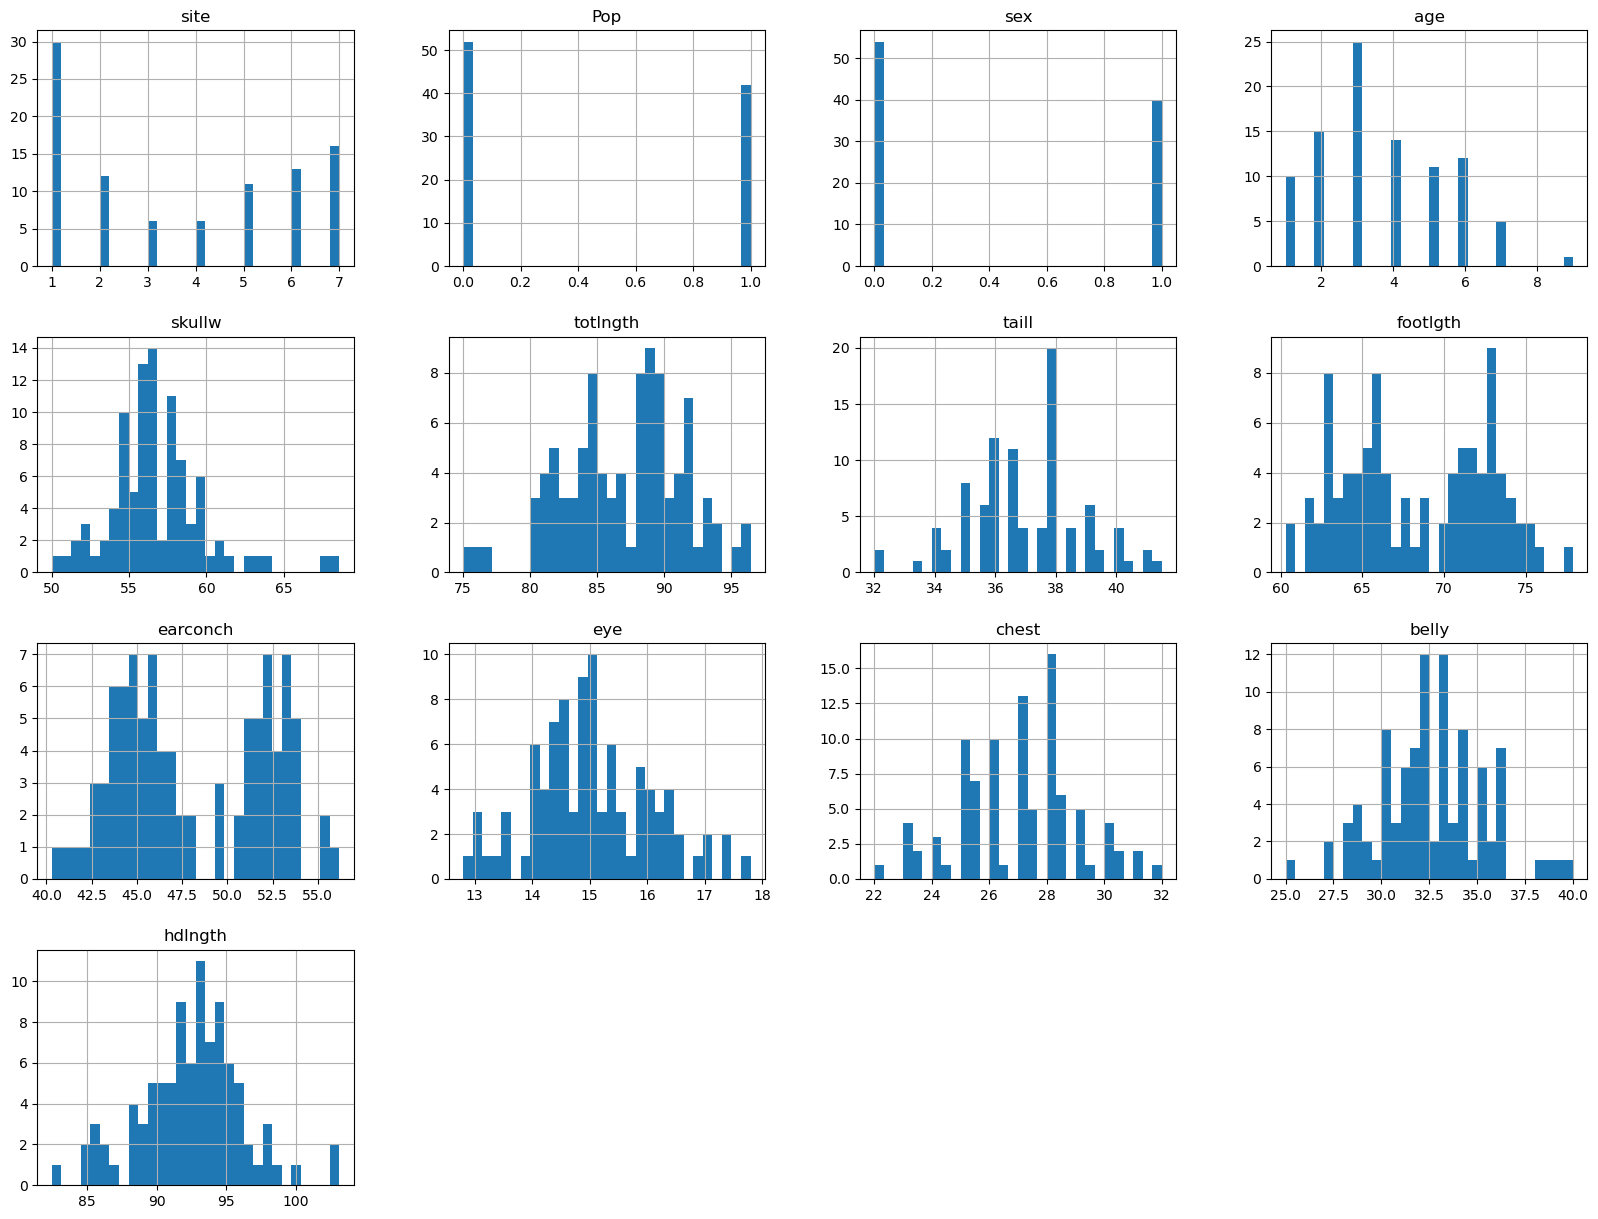

In [20]:
data.hist(bins=30, figsize=(20,15))

Finding correlation between the attributes

In [21]:
corr_mat = data.corr()

In [22]:
hdlngth_corrs = corr_mat['hdlngth'].sort_values(ascending=True)
# top 5 correlations
hdlngth_corrs[-5:]

belly       0.573522
chest       0.640462
skullw      0.700534
totlngth    0.710840
hdlngth     1.000000
Name: hdlngth, dtype: float64

Plotting a scatter plot of the correlations

In [23]:
from pandas.plotting import scatter_matrix

array([<Axes: xlabel='hdlngth', ylabel='belly'>,
       <Axes: xlabel='hdlngth', ylabel='chest'>,
       <Axes: xlabel='hdlngth', ylabel='skullw'>,
       <Axes: xlabel='hdlngth', ylabel='totlngth'>,
       <Axes: xlabel='hdlngth', ylabel='hdlngth'>], dtype=object)

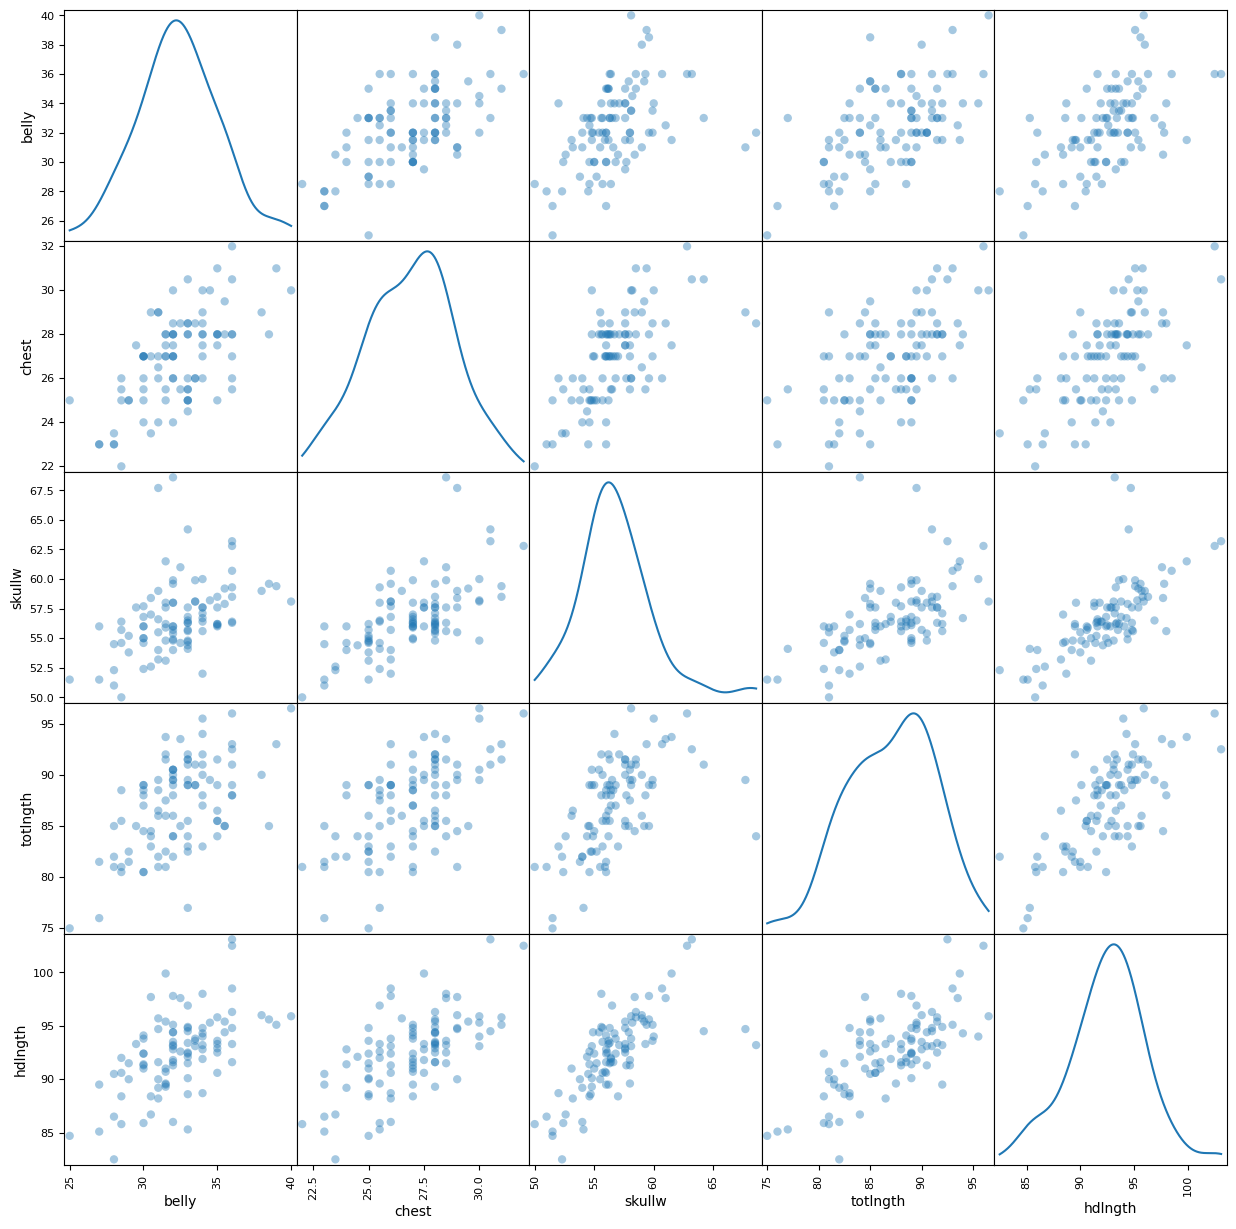

In [24]:
scatter_matrix(data[['belly', 'chest', 'skullw', 'totlngth', 'hdlngth']], alpha=0.4, diagonal='kde', marker='o', figsize=(15, 15))[:, 4]

Plotting a correlation grraph: `hdlngth` vs other attributes 

In [25]:
hdlngth_corrs_arr = np.array(hdlngth_corrs)
hdlngth_corrs

site       -0.154450
sex        -0.092998
Pop         0.011267
earconch    0.139605
taill       0.298937
age         0.309002
eye         0.315638
footlgth    0.403410
belly       0.573522
chest       0.640462
skullw      0.700534
totlngth    0.710840
hdlngth     1.000000
Name: hdlngth, dtype: float64

In [27]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Correlation of features with label-value')

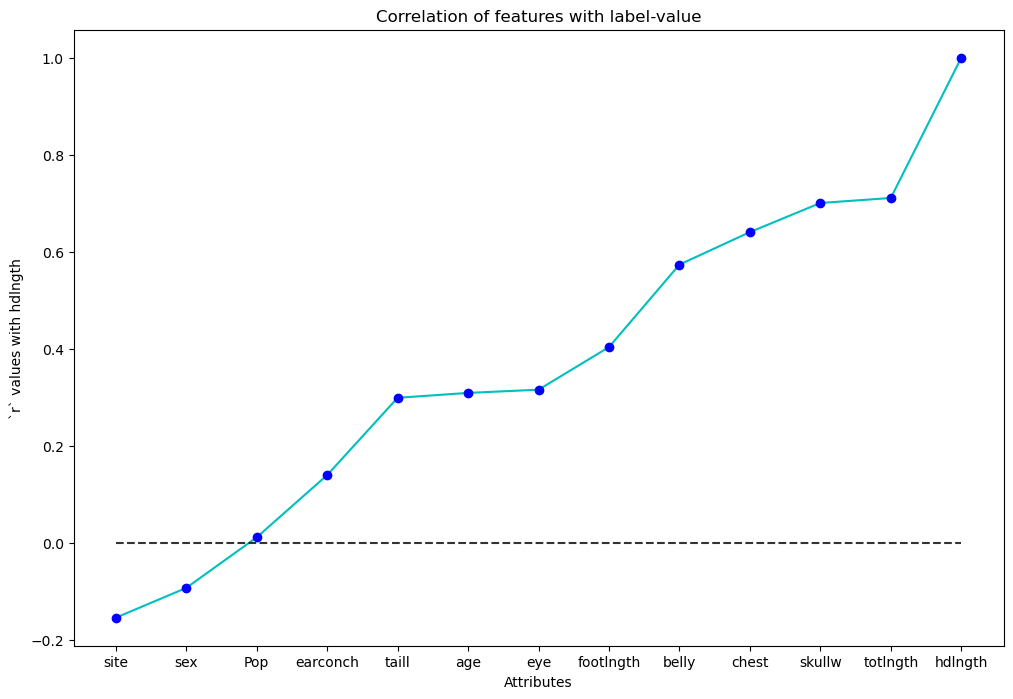

In [28]:
plt.figure(figsize=(15*0.8, 10*0.8))
plt.plot(['site', 'sex', 'Pop', 'earconch', 'taill', 'age', 'eye', 'footlngth', 'belly', 'chest', 'skullw', 'totlngth', 'hdlngth'], hdlngth_corrs_arr, 
        'c-' )
plt.plot(['site', 'sex', 'Pop', 'earconch', 'taill', 'age', 'eye', 'footlngth', 'belly', 'chest', 'skullw', 'totlngth', 'hdlngth'], hdlngth_corrs_arr, 
        'bo' )
plt.plot(np.linspace(0, 12, num=13), [0 for _ in range(13)], 'k--', alpha=0.8)
plt.xlabel('Attributes')
plt.ylabel('`r` values with hdlngth')
plt.title('Correlation of features with label-value')

# Data Prepration

Cleaning missing values

In [29]:
# Function for filling NA values: if only NA values are sparse in the data
def fillna_with_median(data):
    null_df = data.isnull()
    
#     getting alist of columns with null values
    col_with_na = []
    for row in range(len(null_df)):
        for col in null_df.columns:
            if null_df.loc[row, col] == True: col_with_na.append(col)
            
    col_with_na = np.unique(col_with_na)
    
#     filling with median
    for col in col_with_na:
        data[col].fillna(data[col].median(), inplace=True)

In [30]:
fillna_with_median(data)

Removing `Pop` axis since it has a correlation of $0.013$

In [31]:
data.drop(['Pop'], axis=1, inplace=True)
data.head()

,site,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,hdlngth
0,1.0,1.0,5.0,55.4,90.5,35.0,73.4,53.9,15.2,28.0,32.0,94.4
1,1.0,1.0,4.0,56.7,94.0,39.0,74.8,52.0,14.9,28.0,34.0,94.3
2,7.0,0.0,6.0,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5,97.7
3,7.0,0.0,4.0,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0,94.8
4,6.0,0.0,1.0,51.0,81.0,36.5,63.0,44.3,13.2,23.0,28.0,86.5


Seperate the `X_train` and `y_train`

In [32]:
X_train = np.array(data.drop(['hdlngth'], axis=1, inplace=False).copy())
y_train = np.array(data['hdlngth'].copy())

X_train.shape, y_train.shape, X_train[:2], y_train[:2]

((94, 11),
 (94,),
 array([[ 1. ,  1. ,  5. , 55.4, 90.5, 35. , 73.4, 53.9, 15.2, 28. , 32. ],
        [ 1. ,  1. ,  4. , 56.7, 94. , 39. , 74.8, 52. , 14.9, 28. , 34. ]]),
 array([94.4, 94.3]))

# Training the model: `RandomForestRegressor`

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [34]:
rf_reg = RandomForestRegressor()

In [35]:
cvs1 = cross_val_score(rf_reg, X_train, y_train, cv=5)
cvs1, cvs1.mean(), cvs1.std()

(array([0.67447292, 0.58441386, 0.7147501 , 0.60624573, 0.66326491]),
 0.6486295015646736,
 0.04727376281357752)

## Fine tuning

In [36]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
for feature, importance in zip(data.columns, rf_reg.feature_importances_):
    print(f'{feature} : {importance*100}%')

site : 1.9518273379991644%
sex : 0.5955543477911485%
age : 2.8405786373259625%
skullw : 59.25560843765243%
totlngth : 16.635751770190282%
taill : 1.4751680616033216%
footlgth : 3.3942578138727595%
earconch : 2.6050753611033284%
eye : 3.8410062896443304%
chest : 4.098431813556162%
belly : 3.306740129261114%


Using `Gridsearch` for hyperparam selection

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = [
    {
    'n_estimators':[20, 40, 80, 100, 200], 
    'max_depth':[1, 2, 4, 8], 
    'max_features':[0.3, 0.5], 
#     'bootstrap':[True], 
    'random_state':[42], 
    'max_samples': [1/4, 1/3, 1/5], 
    }, 
    {
    'n_estimators':[20, 40, 80, 100, 200], 
    'max_depth':[1, 2, 4, 8], 
    'max_features':[0.3, 0.5], 
    'bootstrap':[False], 
    'random_state':[42], 
#     'max_samples': [1/4, 1/3, 1/5], 
    }
]

grid_searcher = GridSearchCV(rf_reg, params, scoring='neg_mean_squared_error', cv=3)

%timeit grid_searcher.fit(X_train, y_train)

1min 15s ± 183 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
grid_searcher.best_params_, grid_searcher.best_score_

({'bootstrap': False,
  'max_depth': 8,
  'max_features': 0.3,
  'n_estimators': 40,
  'random_state': 42},
 -4.273486718943661)

In [41]:
model = grid_searcher.best_estimator_

Pickling the tuned model

In [42]:
import joblib

joblib.dump(model, 'forest_model.pkl')

['forest_model.pkl']

In [43]:
# load model 
model = joblib.load('forest_model.pkl')

Using `cross_val_predict` to get an idea of the resulting outcomes

In [44]:
from sklearn.model_selection import cross_val_predict

In [45]:
cv_preds = cross_val_predict(model, X_train, y_train, cv=3)
print(f'Prediction : Actual')
for i in range(10):
    print(f'{cv_preds[i]} : {y_train[i]} ; diff={abs(y_train[i] - cv_preds[i])}')

Prediction : Actual
93.9245535714286 : 94.4 ; diff=0.4754464285714022
93.83504761904764 : 94.3 ; diff=0.46495238095235436
93.9358958333333 : 97.7 ; diff=3.764104166666698
91.3181875 : 94.8 ; diff=3.4818125000000038
87.64 : 86.5 ; diff=1.1400000000000006
94.25639880952382 : 91.5 ; diff=2.756398809523816
93.13609077380953 : 90.6 ; diff=2.5360907738095335
93.18751190476193 : 90.6 ; diff=2.5875119047619393
95.91025000000002 : 95.1 ; diff=0.8102500000000248
90.88037499999999 : 90.5 ; diff=0.3803749999999866


Plotting cross validated predictions with actual values

In [52]:
def plot_predicted_vs_actual(predicted, target, title, ):
    plt.figure(figsize=(10,6))
    plt.plot([_ for _ in range(len(predicted))], predicted, 'c-', alpha=0.5, label='Cross val prediction')
    plt.plot([_ for _ in range(len(target))], target, 'r-', label='Actual values')
    plt.legend()
    plt.xlabel('Instances')
    plt.ylabel('hdlngth values')
    plt.title(title)

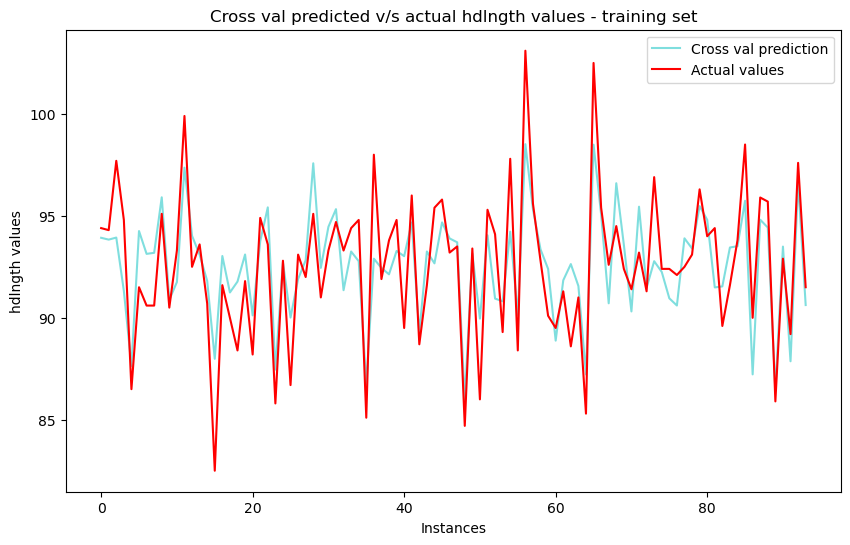

In [53]:
plot_predicted_vs_actual(cv_preds, y_train, 'Cross val predicted v/s actual hdlngth values - training set')

### Finding genralization error - testing on test set

In [60]:
test_data = (np.concatenate((X_test, y_test.reshape(len(y_test),1)), axis=1))

test_data = pd.DataFrame(test_data, columns=['site', 'Pop', 'sex', 'age', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'hdlngth'], copy=True)
test_data

,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,hdlngth
0,1,Vic,m,3.0,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0,92.8
1,5,other,f,3.0,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0,90.4
2,5,other,f,5.0,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5,93.5
3,4,other,m,7.0,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5,96.9
4,2,Vic,m,NaN,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0,91.4
5,7,other,m,7.0,57.6,84.0,35.5,64.2,45.1,14.4,29.0,35.0,91.8
6,7,other,m,2.0,56.3,85.0,37.0,67.6,46.8,14.5,25.5,31.0,90.7
7,3,other,m,5.0,63.2,85.0,34.0,66.9,44.9,17.0,28.0,35.0,98.6
8,1,Vic,f,9.0,57.2,89.5,39.0,77.2,51.3,14.9,31.0,34.0,93.3
9,1,Vic,m,8.0,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,94.1


In [64]:
test_data_num = pd.DataFrame(test_data.drop(labels=['Pop', 'sex'], axis=1), dtype=np.float64)
test_data_cat = pd.DataFrame(test_data, columns=['Pop', 'sex'], copy=True)

In [65]:
test_encoded_ = OH_encoder.fit_transform(test_data_cat)
test_encoded = np.concatenate((test_encoded_[:, 0].reshape(-1, 1), test_encoded_[:, 2].reshape(-1, 1)), axis=1)
test_encoded[:5], encoded[:5]

(array([[1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 0.],
        [1., 0.]]),
 array([[1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]))

In [66]:
test_data['Pop'] = test_encoded[:,0]
test_data['sex'] = test_encoded[:, 1]

test_data.head()

,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,hdlngth
0,1,1.0,0.0,3.0,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0,92.8
1,5,0.0,1.0,3.0,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0,90.4
2,5,0.0,1.0,5.0,57.4,88.5,38.0,68.2,41.7,14.0,29.0,38.5,93.5
3,4,0.0,0.0,7.0,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5,96.9
4,2,1.0,0.0,NaN,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0,91.4


In [68]:
test_data = pd.DataFrame(test_data, dtype=np.float64)

In [69]:
fillna_with_median(test_data)

In [70]:
test_data.drop(['Pop'], axis=1, inplace=True)

In [71]:
X_test = np.array(test_data.drop(['hdlngth'], axis=1, inplace=False).copy())
y_test = np.array(test_data['hdlngth'].copy())

X_test.shape, y_test.shape, X_test[:2], y_test[:2]

((10, 11),
 (10,),
 array([[ 1. ,  0. ,  3. , 54.1, 93. , 37. , 68. , 52.5, 14.5, 27. , 31. ],
        [ 5. ,  1. ,  3. , 55.8, 86. , 36.5, 63.2, 44.2, 15.7, 26.5, 34. ]]),
 array([92.8, 90.4]))

|__> Should've made a pipeline

In [72]:
from sklearn.metrics import mean_squared_error

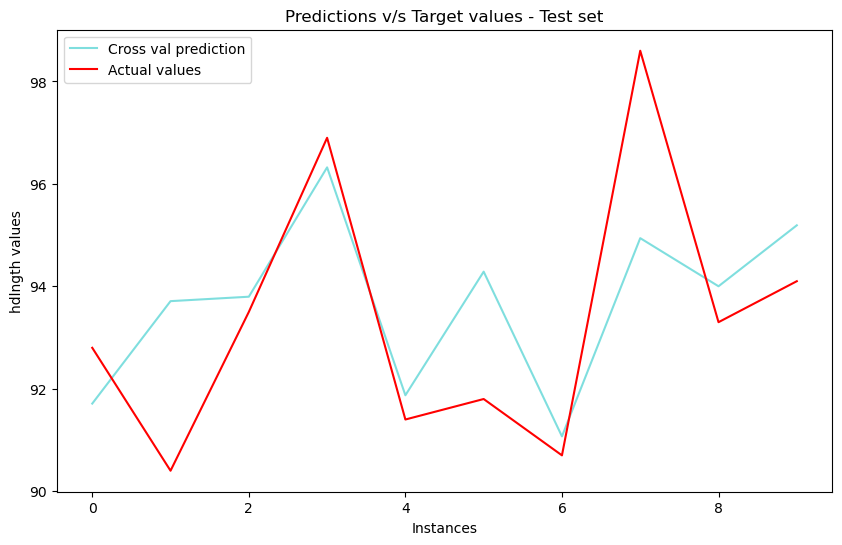

In [73]:
predictions = model.predict(X_test)

plot_predicted_vs_actual(predictions, y_test, 'Predictions v/s Target values - Test set')

In [74]:
mean_squared_error(y_test, predictions)

3.418751979883755